In [34]:
    # Nomor 1
    
    import pandas as pd
    import numpy as np

    energy = pd.read_excel('../Data Files/Energy+Indicators.xls', skiprows=17)
    energy = energy.drop(['Unnamed: 0', 'Unnamed: 2'], axis=1)
    energy = energy.iloc[0:227]
    energy = energy.rename(columns={
        'Unnamed: 1' : 'Country',
        'Petajoules' : 'Energy Supply',
        'Gigajoules' : 'Energy Supply per Capita',
        '%' : '% Renewable'
        })
    energy = energy.replace('...', np.NaN)
    energy = energy.replace({
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong",
        'Iran (Islamic Republic of)':'Iran'
    })
    energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] = energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].apply(pd.to_numeric)
    energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")
    energy['Country'] = energy['Country'].str.replace('\d+','')
    energy['Energy Supply'] = energy['Energy Supply']*1000000

    GDP = pd.read_csv('../Data Files/world_bank.csv', skiprows=4)
    GDP['Country Name'] = GDP['Country Name'].replace({
        "Korea, Rep.": "South Korea", 
        "Iran, Islamic Rep.": "Iran",
        "Hong Kong SAR, China": "Hong Kong"
    })

    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.columns = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

    ScimEn = pd.read_excel('../Data Files/scimagojr-3.xlsx')
    ScimEn = ScimEn[:15]
    ScimEn

    df_beta = pd.merge(ScimEn, energy, how='inner', left_on='Country', right_on='Country')
    df = pd.merge(df_beta, GDP, how='inner', left_on='Country', right_on='Country')
    df = df.set_index('Country')
    df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [35]:
# Nomor 2

156 # :v

156

In [36]:
# Nomor 3

# Rata-rata setiap country di 10 tahun terakhir

Top15 = df
average_GDP = Top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
average_GDP = average_GDP.mean(axis=1).sort_values(ascending=False).rename('avgGDP')
average_GDP

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [37]:
# Nomor 4

Top15 = df
selisih = Top15[Top15['Rank'] == 4]['2015'] - Top15[Top15['Rank'] == 4]['2006']

selisih.values[0]

246702696075.3999

In [38]:
# Nomor 5

Top15 = df
Top15['Energy Supply per Capita'].mean()

157.6

In [51]:
# Nomor 6

Top15 = df
maxAVG = Top15[Top15['% Renewable'] == Top15['% Renewable'].max()]
(maxAVG['% Renewable'].index.values[0], maxAVG['% Renewable'].values[0])

('Brazil', 69.64803)

In [62]:
# Nomor 7

Top15 = df
Top15['Ratio Citations'] = Top15['Self-citations'] / Top15['Citations']
maxRatio = Top15[Top15['Ratio Citations'] == Top15['Ratio Citations'].max()]['Ratio Citations']
(maxRatio.index.values[0], maxRatio.values[0])

('China', 0.6893126179389422)

In [75]:
# Nomor 8

Top15 = df
Top15['Estimate Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Estimate Population']
estimate = Top15['Estimate Population'].sort_values(ascending=False)
estimate.reset_index().iloc[2]['Country']


'United States'

In [78]:
# Nomor 9

Top15 = df
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable Doc per Capita'] = Top15['Citable documents'] / Top15['PopEst']
answer = Top15['Citable Doc per Capita'].corr(Top15['Energy Supply per Capita'])

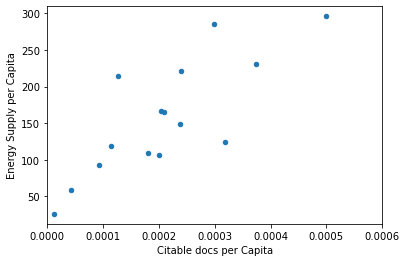

In [80]:
# Nomor 9 (PLOT)

import matplotlib.pyplot as plt

Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [95]:
# ICE BREAKING

# Median versi ribet
Top15 = df
median_ribet = Top15.iloc[round(len(Top15['% Renewable'])/2)]['% Renewable']
#######################

# Median versi simple

Top15 = df
median_simple = Top15['% Renewable'].median()

median_simple == median_ribet

True

In [107]:
# Nomor 10

Top15 = df
Top15['HighRenew'] = [1 if x >= Top15['% Renewable'].median() else 0 for x in Top15['% Renewable']]
Top15['HighRenew'].sort_index()

Country
Australia             0
Brazil                1
Canada                1
China                 1
France                1
Germany               1
India                 0
Iran                  0
Italy                 1
Japan                 0
Russian Federation    1
South Korea           0
Spain                 1
United Kingdom        0
United States         0
Name: HighRenew, dtype: int64

In [110]:
# Nomor 11

Top15 = df

    ContinentDict  = {'China':'Asia', 
                    'United States':'North America', 
                    'Japan':'Asia', 
                    'United Kingdom':'Europe', 
                    'Russian Federation':'Europe', 
                    'Canada':'North America', 
                    'Germany':'Europe', 
                    'India':'Asia',
                    'France':'Europe', 
                    'South Korea':'Asia', 
                    'Italy':'Europe', 
                    'Spain':'Europe', 
                    'Iran':'Asia',
                    'Australia':'Australia', 
                    'Brazil':'South America'}

    Top15['EstPop'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
    Top15 = Top15.reset_index()
    Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
    answer = Top15.set_index('Continent').groupby(level=0)['PopEst'].agg({'size': np.size, 'sum': np.sum, 'mean': np.mean,'std': np.std})
    answer = answer[['size', 'sum', 'mean', 'std']]






SpecificationError: nested renamer is not supported

In [112]:
# Nomor 12
import pandas as pd
import numpy as np
Top15 = df
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
Top15 = Top15.reset_index()
Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
Top15['bins'] = pd.cut(Top15['% Renewable'],5)

In [119]:
# Nomor 13
# Buat angka ribuan dengan koma


import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

Top15 = df
Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
Top15['PopEst']

stringg = []

for num in Top15['PopEst']:
    stringg.append(locale.format('%.9f', num, grouping=True))

Top15['PopEst'] = stringg
Top15['PopEst']

stringg

['1,367,645,161.290322542',
 '317,615,384.615384638',
 '127,409,395.973154366',
 '63,870,967.741935484',
 '143,500,000.000000000',
 '35,239,864.864864863',
 '80,369,696.969696969',
 '1,276,730,769.230769157',
 '63,837,349.397590362',
 '49,805,429.864253394',
 '59,908,256.880733944',
 '46,443,396.226415098',
 '77,075,630.252100840',
 '23,316,017.316017315',
 '205,915,254.237288147']